<a href="https://colab.research.google.com/github/Sineyoko19/Projet_python_final/blob/main/TD1_Sineyoko_Assitan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TD1 : Deep learning


## Exercice 1: Quick start with GC Environnement 

#### Importation de l'API pythorch

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

#### Activation de tenserflow

In [3]:
try:
 #%tensorflow_version 2.0 provide a method for printing the TensorFlow version...
 #method: tf.version.VERSION
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


#### Importation du package tenserflow

In [4]:
import tensorflow as tf
print(tf.version.VERSION)


2.9.2


In [5]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#### Importation  du dataset 


##### Avec pythorch

In [6]:
# Download training data from open datasets.
training_data = datasets.MNIST(
  root="data", #root is the path where the data is stored,
  train=True, #specifies the training dataset,
  download=True, #downloads the data from the internet if it is not available at root
  transform=ToTensor()#, #A function that takes in an PIL image and returns a transformed
 # version
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [7]:
training_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
type(training_data)

torchvision.datasets.mnist.MNIST

##### Avec tenserflow

In [9]:
#import the tensorflow datasets
import tensorflow_datasets as tfds
# Constract the MNIST dataset.
mnist_data=tfds.load('mnist', split='train', shuffle_files=True)


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [10]:
type(mnist_data)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

## Exercice 2: Data preparing

In [11]:
#import tenserflow_datasets as tfds
MNIST_dataset=keras.datasets.mnist
mnist_data=MNIST_dataset.load_data()

11490434/11490434 [==============================] - 1s 0us/step


#### Loading the train and test set with the images and their labels

In [12]:
(train_images, train_labels),(test_images, test_labels) = mnist_data

In [13]:
len_train=len(train_images)
len_test=len(test_images)
print("number of train images",len_train)
print("number of test images",len_test)


number of train images 60000
number of test images 10000


In [14]:
train_labels[1]

0

and the array correspondant is ;


In [15]:
train_images[[1]]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,
           0,   0,   0

2. You can check the labels values by transforming fisrt the label array to a simple list

In [83]:
labels = train_labels.tolist()
print("labels values",labels[0:10]) #Print the first eleven to have a better view in the html


labels values [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]


3. Check the length of the train and the test label’s arrays

In [17]:
arrays_len_test= len(test_labels)
arrays_len_train=  len(train_labels)

print("The length of the test arrays are:", arrays_len_test)
print("The length of the train arrays are:", arrays_len_train)

The length of the test arrays are: 10000
The length of the train arrays are: 60000


In [18]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

4. train and test datasets are splited to train your model and to test its performance and its capacity to generalize.
5. print the pixels image values from any sample:
1 

In [19]:
print("image pixel values \n",train_images[1], " \n label of the image: ",
train_labels[1])


image pixel values 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  

6 . print an image resolution by using the method shape on an image

In [20]:
print(" image resolution:", train_images[0].shape)

 image resolution: (28, 28)


## Exercice 3:Image plotting

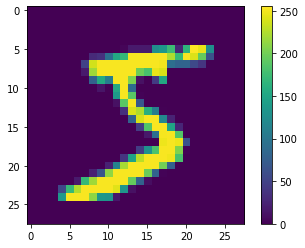

In [21]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow ( train_images [0])
plt.colorbar ()
plt.grid ( False )
plt.show ()


1. You can write a simple function named displayImages allowing you to plot the image pixels and to display
its label value as an integer value.


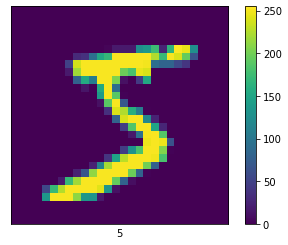

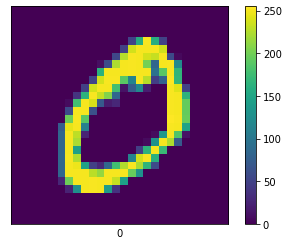

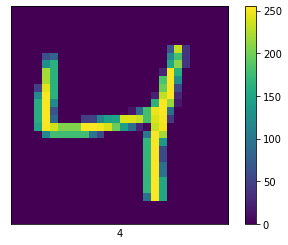

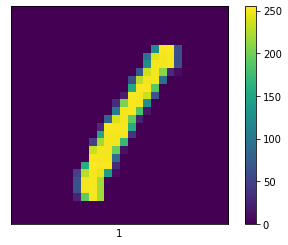

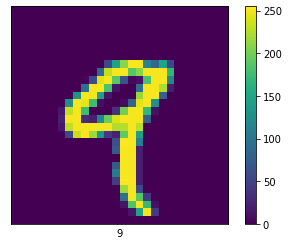

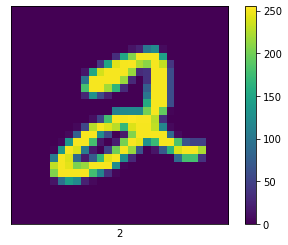

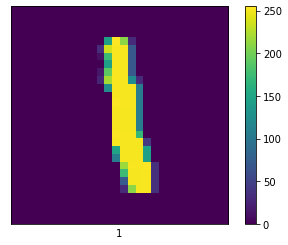

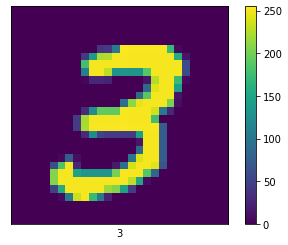

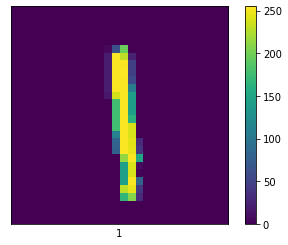

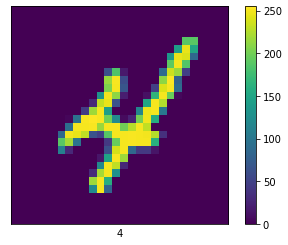

In [22]:
def displayImages(nbImages,imageDataset, labels):
    i= 0
    for image in imageDataset:
      plt.figure()
      plt.imshow (imageDataset[i])
      plt.colorbar()
      plt.grid ( False )
      plt.xticks([])
      plt.yticks([])
      plt.xlabel(labels[i])
      plt.show()
      i = i + 1
      if i == nbImages:
          break
displayImages(10,train_images, train_labels)

2. You can write a simple function named displayGridImages allowing to plot a grid of n × n image and their
associated labels at the X-axis

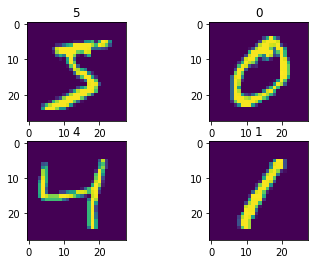

In [28]:
def displayGridImages(nbImages,imageDataset, labels):
    row=nbImages
    col=nbImages
    fig,axes= plt.subplots(row,col)
    axes=axes.ravel() #Transforme un array de dimension (n,m) en (1,n*m) 
    for i  in range(nbImages*nbImages):
      axes[i].imshow (imageDataset[i])
      axes[i].set_title(labels[i])
    plt.show()
displayGridImages(2,train_images, train_labels)

3. What is the range values of the pixels of any images from train or test dataset?

*Response:* The range values of the pixels  of any image in the train or the test dataset is  between 0 and 255 

4. Normalize the pixels of ant image from train or test dataset: 

To do so, we have to do the minmax scaling, which mean that we will take the value of each pixel x and : x_scaled = (x-min)/(max)
since here the min and max are known and are respectively equals to 0 and 255 so we will have for each value of pixel scaled: x_scaled= x/255.

(The question is actually responded in the data preprocessing).

## Exercice 3.2:Simple neural network model to imge classification



Data preparation or data preprocessin

In [47]:
#number of labels=number of classes
num_classes = 10
#define the shape of input data
input_shape = (28, 28, 1) #nb lines, nb cols and depth (valeur codage de la couleur)
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(train_images, -1) 
x_test = np.expand_dims(test_images, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
# Normalization: Scale images to the [0, 1] range
x_train = train_images.astype("float32") / 255 #Scaling des valeurs
x_test = test_images.astype("float32") / 255


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [48]:
# convert class arrays to binary class matrices
y_train = keras.utils.to_categorical(train_labels, num_classes)
y_test = keras.utils.to_categorical(test_labels, num_classes)


Dans le code précédent, on transforme chaque valeur de label en un vecteur

 **You can execute the hole code to prepare you data. What does mean the following message xtrainshape ?**


It means that we have 60 000 samples (images), each of them being 28x28 (row x col) and with a depth of 1 

# Model Architecture: model1

### Model creation


Sequential layers means that the model is a succession of layers with each of them having a specific utility

In [49]:
model1= keras.Sequential([
keras.layers.Flatten(input_shape=input_shape),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(10, activation='softmax')
])
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


*We can see that our model have 3 layers as precised in the model.
The flatten layer (which function allows transform the 28x28 array into a (1,28*28=784) array so 784 neurons.

The first Dense layer with the activation function relu: it used to modify the dimension of the tensor (the (1,748) array) and has 128 neurons.

Finally, the second Dense layer with the activation function softmax and has 10 neurons*

The layers here are called hidden layers. 
The input layer is the 28x28 image given.

## Exercice 4: Model's training step


#### Compiling step

-  the loss function (allows the model to evaluate itself during the training. Calculate the error between the output given after the model fitted and the input label given).
 
- The optimizer mechanism ( allows the model to update itself by responding to the need of minimizing the loss function.)

- Metrics : (allows to have an overall view of the performance of the model after train and for the validation (if done) and test step.)

In [53]:
model1.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

#### Train step

In [54]:
batch_size=128
epochs=15
model1.fit(x_train,y_train, batch_size=batch_size,epochs=epochs)

Epoch 1/15
469/469 [==============================] - 5s 9ms/step - loss: 0.3628 - accuracy: 0.9001
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 0.1691 - accuracy: 0.9520
Epoch 3/15
469/469 [==============================] - 4s 8ms/step - loss: 0.1201 - accuracy: 0.9660
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0935 - accuracy: 0.9732
Epoch 5/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0750 - accuracy: 0.9784
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0620 - accuracy: 0.9822
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0519 - accuracy: 0.9851
Epoch 8/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0433 - accuracy: 0.9880
Epoch 9/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0364 - accuracy: 0.9901
Epoch 10/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0318 - accuracy: 0.9911

We can see that during each epoch, the loss function is lowered as much as possible thanks to the optimizer mechanism.

And through each iteration, the accuracy is calculated and the model get to learn the dataset better and train on it better which allow to have a small loss function and a good accuracy.

## Exercice 5: Model Evaluation

We are now going to fit our model to the test set to be able to evaluate the model (study its performance of response and also study if there are any risks  of over/ under fitting) 

In [57]:
score=model1.evaluate(x_test,y_test, verbose=True)
print("Test loss:", score[0])
print("Test accuracy:",score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0788 - accuracy: 0.9778
Test loss: 0.0787929818034172
Test accuracy: 0.9778000116348267


## Exercice 6: Model Prediction

Based on the trained model, we can now predict the output label using features (here it is out 28*28 pixels images).

In [64]:
predictions_1= model1.predict(x_test)
print(predictions_1[0]) # The prediction here is a (1, 10) array with each value representing the probability that x_test[0] is the value of its index (0 to 9)
#Let print the prediction
print("Observed class : {} , predicted_class: {}".format(y_test[0],np.argmax(predictions_1[0])))

313/313 [==============================] - 1s 4ms/step
[1.5951107e-07 5.4510191e-10 5.5904231e-08 3.7636382e-03 2.7928330e-12
 2.1184117e-06 1.2656368e-12 9.9618608e-01 1.6764313e-08 4.7867685e-05]
Observed class : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] , predicted_class: 7


# Model Architecture: model2

In [74]:
from keras import layers
model_2=keras.Sequential([
    
    keras.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes,activation="softmax"),
])
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_5 (Dropout)         (None, 1600)             

In comparison to the first model, this model firstly use 7 hidden layers.

The biggest difference is that this model uses convolutional layers while the first one does not.

THe difference being that this model uses a number of filter on the pixels given (32 and 64) while the model 1 does not.

This model create convulutional neural network ( which are  mainly use in image classification) 
CNN have convulutional layers that uses filters that are able to detect patterns. 
Here each are size 3 by 3.

The next layer coming after the convolutional layer will use the convolutional matrix (or array) created by the convolve that happened previously.

Convolving means that the input matrix is passed through each 3 by 3 filter.

More filter detects more edges which mean more patterns.

## Exercice 4_2: Model's training 

#### Compiling step

In [75]:
model_2.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [77]:
model_2.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 44s 105ms/step - loss: 0.0306 - accuracy: 0.9900 - val_loss: 0.0137 - val_accuracy: 0.9962
Epoch 2/15
422/422 [==============================] - 45s 108ms/step - loss: 0.0289 - accuracy: 0.9906 - val_loss: 0.0160 - val_accuracy: 0.9958
Epoch 3/15
422/422 [==============================] - 44s 104ms/step - loss: 0.0274 - accuracy: 0.9911 - val_loss: 0.0146 - val_accuracy: 0.9960
Epoch 4/15
422/422 [==============================] - 44s 104ms/step - loss: 0.0268 - accuracy: 0.9909 - val_loss: 0.0164 - val_accuracy: 0.9952
Epoch 5/15
422/422 [==============================] - 55s 129ms/step - loss: 0.0261 - accuracy: 0.9914 - val_loss: 0.0180 - val_accuracy: 0.9953
Epoch 6/15
422/422 [==============================] - 56s 132ms/step - loss: 0.0256 - accuracy: 0.9914 - val_loss: 0.0180 - val_accuracy: 0.9945
Epoch 7/15
422/422 [==============================] - 65s 153ms/step - loss: 0.0256 - accuracy: 0.9913 - val_loss: 0.0178 - val_ac

What is interesting here about fitting this model is that 10% of the train dataset is used for the validation, so we get to have the view on how well the training is going and we get to have the opportunity to compare result in order to maybe tune the model for better result.

#### Model evaluation

In [78]:
score_2=model_2.evaluate(x_test, y_test, verbose=2)
print("Test loss: ", score_2[0])
print("Test accurary: ", score_2[1])

313/313 - 3s - loss: 0.0231 - accuracy: 0.9922 - 3s/epoch - 8ms/step
Test loss:  0.023147130385041237
Test accurary:  0.9922000169754028


#### Model prediction

In [80]:
prediction_2= model_2.predict(x_test)
print("Observed class : {} , predicted_class: {}".format(y_test[0],np.argmax(prediction_2[0])))

313/313 [==============================] - 3s 9ms/step
Observed class : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] , predicted_class: 7


It could also be interesting to add the validation in the first model and to compare both of them


In [81]:
model1.fit(x_train,y_train, batch_size=batch_size,epochs=epochs,validation_split=0.1)
score=model1.evaluate(x_test,y_test, verbose=True)
print("Test loss:", score[0])
print("Test accuracy:",score[1])

Epoch 1/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0125 - accuracy: 0.9973 - val_loss: 0.0114 - val_accuracy: 0.9967
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0096 - accuracy: 0.9982 - val_loss: 0.0113 - val_accuracy: 0.9973
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0085 - accuracy: 0.9986 - val_loss: 0.0132 - val_accuracy: 0.9950
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0074 - accuracy: 0.9988 - val_loss: 0.0160 - val_accuracy: 0.9950
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0063 - accuracy: 0.9992 - val_loss: 0.0176 - val_accuracy: 0.9942
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0057 - accuracy: 0.9991 - val_loss: 0.0160 - val_accuracy: 0.9947
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0041 - accuracy: 0.9995 - val_loss: 0.0245 - val_accuracy: 0.9918
Epoch 

## Conclusion on both models: 

As we can see by the accuraries on the test,  the convolutional neural network predict better the number written on images than the simple neural network.

This is due to the fact that the convotulutional neural network learns the pattern thanks to the filters and with the compilation steps, minimize as much as possible the loss function and maximize the metric (here the accuracy).

Therefore, as for images classification, it is very likely and advantageous to use the CNN for better results.

In [84]:
%%shell
jupyter nbconvert --to html /content/TD1_Sineyoko_Assitan.ipynb

[NbConvertApp] Converting notebook /content/TD1_Sineyoko_Assitan.ipynb to html
[NbConvertApp] Writing 475887 bytes to /content/TD1_Sineyoko_Assitan.html
